# Feature Extraction/Engineering
In image processing, feature extraction is the process of getting specific information or characteristics of an image that makes it different from other images. The process involves finding the distinctive parts of an image, like; lines, edges, corners and special patches that can uniquely describe the image.

Extracting features from an image is achievable by treating said image as a 2D signal and understanding the image frequency.  
Concretely, a digital image is a matrix of numbers that represent pixels . Each pixel has a value of 0-255 representing the light intensity on grayscale. Now the rate of change of this grayscale value, throughout the image, is referred to as **image frequency**. If you wish to read more about image signals and frequency, there's a bunch of detailed explanation [here](https://www.quora.com/What-are-frequencies-in-images-Better-if-explained-with-an-example).

In this case, I will be using wavelet transform for this process. There are several other ways around it, but wavelet transform will be optimal because, wavelet transform can not only reflect the distribution of frequency energy, but also preserve the spatial distribution characteristics of image features.  
**NB:** It is important to always convert coloured images to grayscale images before applying wavelet transform. 

In [3]:
# Import the necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pywt  # This is an open source wavelet tranform package for Python
import cv2

I will illustrate how wavelet tranform extract features from an image, before applying it to the entire dataset.

In [7]:
# Read the coloured image and convert to a grayscale image.
image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\clean_dataset\cristiano_ronaldo\cristiano_ronaldo11.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

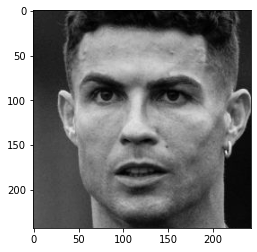

In [8]:
plt.imshow(gray_image, cmap=plt.cm.gray)

In [4]:
# Perform a 3 level Discrete Wavelet Transform
level=3
coeffs = pywt.wavedec2(gray_image, "db3", mode="periodization", level=level)

In [5]:
imageR = pywt.waverec2(coeffs, "db3", mode="periodization")
imageR = np.uint8(imageR)

In [6]:
cA = coeffs[0]
(cH1, cV1, cD1) = coeffs[-1]
(cH2, cV2, cD2) = coeffs[-2]
(cH3, cV3, cD3) = coeffs[-3]

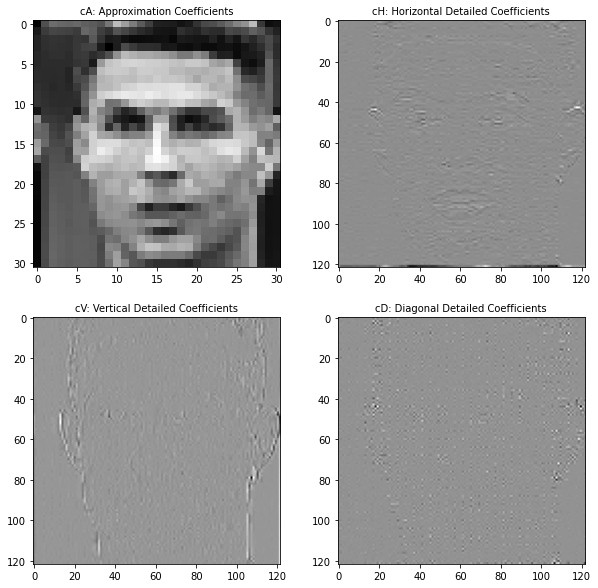

Text(0.5, 1.0, 'Reconstructed Image')

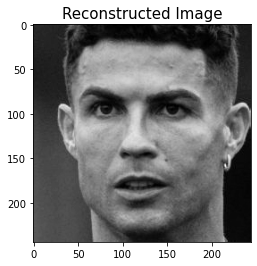

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title("cA: Approximation Coefficients", fontsize=10)

plt.subplot(2, 2, 2)
plt.imshow(cH1, cmap=plt.cm.gray)
plt.title("cH: Horizontal Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 3)
plt.imshow(cV1, cmap=plt.cm.gray)
plt.title("cV: Vertical Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 4)
plt.imshow(cD1, cmap=plt.cm.gray)
plt.title("cD: Diagonal Detailed Coefficients", fontsize=10)

plt.show()

plt.imshow(imageR, cmap="gray")
plt.title("Reconstructed Image", fontsize=15)